# Explolation05
## 딥러닝으로 가위바위보 게임을 만들어보면서, 모델링의 이해와 하이퍼파라미터 조작을 알아보자.

## 필요한 모듈을 불러온다.

In [41]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

print(tf.__version__)
print(np.__version__)

2.8.0
1.21.6


In [7]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 내가 찍은 가위,바위,보 사진들을 불러오자.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 모델을 학습하기전에 사진은 28*28로 사이즈를 변경해야한다. 그래서 함수를 구현해주었다.

In [8]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

   
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

### 가위를 28*28사이즈로 바꿔주자

In [16]:
image_dir_path = "./rock_scissor_paper/scissor"
resize_images(image_dir_path)

360  images to be resized.
360  images resized.


### 바위를 28*28사이즈로 바꿔주자

In [17]:
image_dir_path = "./rock_scissor_paper/rock"
resize_images(image_dir_path)

290  images to be resized.
290  images resized.


### 보를 28*28사이즈로 바꿔주자

In [18]:
image_dir_path = "./rock_scissor_paper/paper"
resize_images(image_dir_path)

298  images to be resized.
298  images resized.


### 다음 과정은 원 핫 인코딩을 위해 가위바위보에 0,1,2값을 할당해주고 그것들을 255로 나눠줌으로써 정규분포로 만드는 과정이다.

In [20]:
def load_data(img_path, number_of_data=948): 
  
    img_size=28
    color=3
   
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0  
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1  
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2  
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path ="./rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 948 입니다.
x_train shape: (948, 28, 28, 3)
y_train shape: (948,)


### 이제 데이터들을 다시 테스트 데이터에 할당해주자.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_train_norm, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=34)

In [43]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0.0  최대값: 1.0


### 데이터를 하나씩 불러와보자

라벨:  1


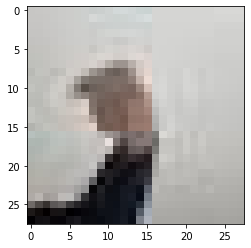

In [44]:
plt.imshow(x_train[500])
print('라벨: ', y_train[500])

라벨:  2


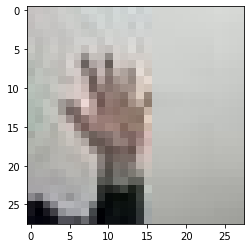

In [45]:
plt.imshow(x_train[2])
print('라벨: ', y_train[2])

라벨:  2


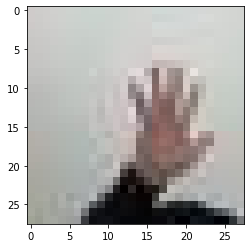

In [47]:
plt.imshow(x_train[600])
print('라벨: ', y_train[600])

### 흐릿하긴하지만 잘 가져와진것같다.

### 이제 레이어를 설정해 보자. 나는 하이퍼파라미터를 16,32,64,128로 총 4층을 쌓고 dense층은 분류를위해 2층만 설정해주었다.
### 이렇게 크게하면 과적합이 일어나지않을까? 걱정했었는데 결과를 보면서 과적합이 일어났나 확인해보자.

In [51]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3), padding="same"))# 1레이어 파라미터 16로설정
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',padding="same"))# 2레이어 파라미터 32로설정
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding="same"))# 3레이어 파라미터 64로설정
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding="same"))# 4레이어 파라미터 128로설정
model.add(keras.layers.MaxPooling2D((1,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))# dense 64
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  11
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_21 (MaxPoolin 

### 이제 쌓은 레이어를 바탕으로 모델을 학습시켜주자.

In [52]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
24/24 [==============================] - 1s 36ms/step - loss: 1.0776 - accuracy: 0.4024
Epoch 2/10
24/24 [==============================] - 1s 36ms/step - loss: 0.8061 - accuracy: 0.6504
Epoch 3/10
24/24 [==============================] - 1s 35ms/step - loss: 0.5150 - accuracy: 0.7968
Epoch 4/10
24/24 [==============================] - 1s 35ms/step - loss: 0.3617 - accuracy: 0.8720
Epoch 5/10
24/24 [==============================] - 1s 36ms/step - loss: 0.2827 - accuracy: 0.8997
Epoch 6/10
24/24 [==============================] - 1s 36ms/step - loss: 0.2021 - accuracy: 0.9327
Epoch 7/10
24/24 [==============================] - 1s 36ms/step - loss: 0.1649 - accuracy: 0.9459
Epoch 8/10
24/24 [==============================] - 1s 34ms/step - loss: 0.1149 - accuracy: 0.9670
Epoch 9/10
24/24 [==============================] - 1s 35ms/step - loss: 0.0765 - accuracy: 0.9815
Epoch 10/10
24/24 [==============================] - 1s 34ms/step - loss: 0.0394 - accuracy: 0.9921


### 결과는 아주 흡족스럽게 나온것같다. 하지만 과적합이 일어났나 확인시켜주기위해 test데이터와 비교해보았다.

In [53]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

6/6 - 0s - loss: 0.0623 - accuracy: 0.9895 - 411ms/epoch - 69ms/step
test_loss: 0.06226525455713272 
test_accuracy: 0.9894737005233765


### 테스트 정확도와 train 정확도가 비슷한걸로봐서 과적합이 일어난것같지는않다.

In [55]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.9935549  0.00495912 0.001486  ]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


### 성능은 괜찮은것같다. 가장높은 결과와 다른결과와의 차이가 큰걸보니 괜찮게 학습시킨것같다.

예측확률분포: [1.1937175e-02 6.5657935e-07 9.8806214e-01]
라벨: 0, 예측결과: 2


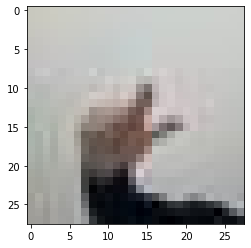

예측확률분포: [1.1937175e-02 6.5657935e-07 9.8806214e-01]
라벨: 0, 예측결과: 2


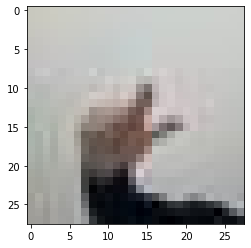

예측확률분포: [1.1937175e-02 6.5657935e-07 9.8806214e-01]
라벨: 0, 예측결과: 2


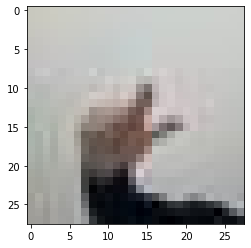

예측확률분포: [6.2440805e-02 2.5506731e-07 9.3755895e-01]
라벨: 0, 예측결과: 2


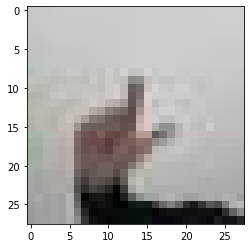

예측확률분포: [1.1937175e-02 6.5657935e-07 9.8806214e-01]
라벨: 0, 예측결과: 2


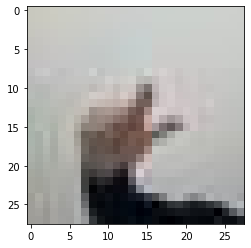

In [56]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 잘못 예측한 결과인데 결과들이 가위를 보로 인식한다. 나중에 가위와 보 사진을 더욱 추가해서 넣어주면 이 문제는 해결될것같다. 

## Explolation05를 하면서 딥러닝을 처음으로 모델링과 학습을 시켜보았으며, 개인적인 견해로써 머신러닝보다 재밌는것같다.
## 그리고 사진수가 적어 결과가 안좋을까 걱정했는데 레이어를 잘 쌓으면 적은 데이터가지고 좋은결과를 만들수있다는것을 알았다.
## 하지만 일반화를 했냐? 그건 장담할수 없을것같다. 이것으로 Explolation05를 마친다.